<a href="https://colab.research.google.com/github/AshishRanshinge/My_Projects/blob/master/Heart_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingestion

## Mount GDrive

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Wire up Kaggle

In [99]:
import os;os.listdir("/content/gdrive/My Drive/Colab Notebooks/Individual_Project")

['kaggle.json']

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/Individual_Project/kaggle.json ~/.kaggle/kaggle.json

## Get Kaggle Heart Disease data

In [101]:
!kaggle datasets download -d ronitf/heart-disease-uci
!ls -l /content
!unzip /content/heart-disease-uci.zip

heart-disease-uci.zip: Skipping, found more recently modified local copy (use --force to force download)
total 24
drwx------ 4 root root  4096 Feb  7 18:52 gdrive
-rw-r--r-- 1 root root 11328 Jun 25  2018 heart.csv
-rw-r--r-- 1 root root  3438 Feb  7 18:52 heart-disease-uci.zip
drwxr-xr-x 1 root root  4096 Feb  6 17:31 sample_data
Archive:  /content/heart-disease-uci.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


# EDA

Importing the necessary packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
df = pd.read_csv("/content/heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


DataFrame columns
* age - age in years 
* sex - (1 = male; 0 = female) 
* cp - chest pain type 
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl 
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg - resting electrocardiographic results 
* thalach - maximum heart rate achieved 
* exang - exercise induced angina (1 = yes; 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - have disease or not (1=yes, 0=no)

In [104]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check for correlation between the features

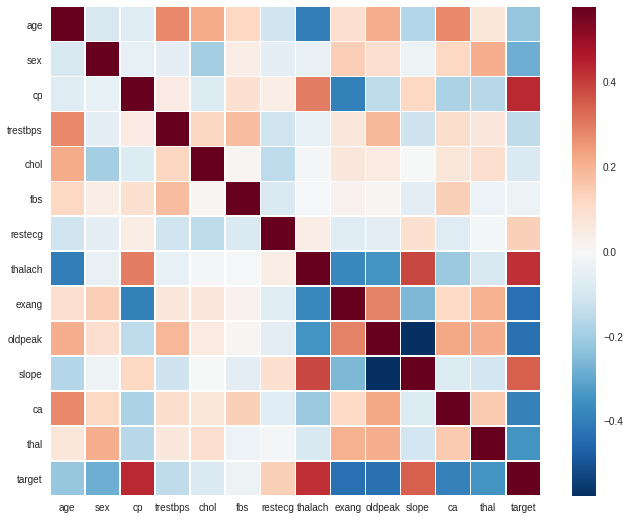

In [105]:
corr=df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(150, 10, as_cmap=True)
seq_col_brew = sns.color_palette("Blues", 4)
cmap = sns.set_palette(seq_col_brew)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, linewidths=.5)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


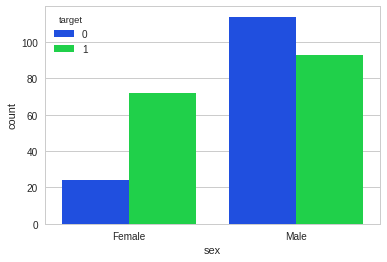

In [106]:
plt.figure() # removes previous plots and creates a blank slate
sns.countplot(x='sex', hue='target', data=df ,palette='bright')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

# Modeling

## kNN Classification

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y=df['target'].values
X=df.drop('target', axis=1).values
X.shape, y.shape

((303, 13), (303,))

In [0]:
# Normalize
X_data = (X - np.min(X)) / (np.max(X) - np.min(X))

### Finding the best k value

In [109]:
X_data.shape, y.shape

((303, 13), (303,))

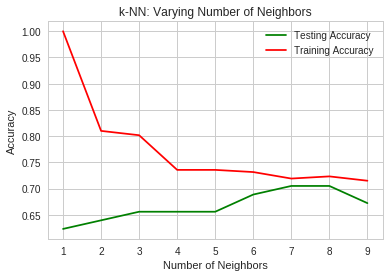

In [110]:
#With train test split
X_train, X_test, y_train, y_test = train_test_split( X_data, y, test_size = 0.2, random_state=32, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, color='green', label = 'Testing Accuracy' )
plt.plot(neighbors, train_accuracy, color='red' ,label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Classification at k=7

In [111]:
#Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

prediction=knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))


0.7049180327868853


## SVM- Support Vector Machine

In [112]:
from sklearn.svm import SVC
svm = SVC(random_state = 100)
svm.fit(X_train, y_train)
print(svm.score(X_test,y_test)*100)

54.09836065573771


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test)*100)

77.04918032786885


## Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print(log_reg.score(X_test,y_test)*100)

55.73770491803278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


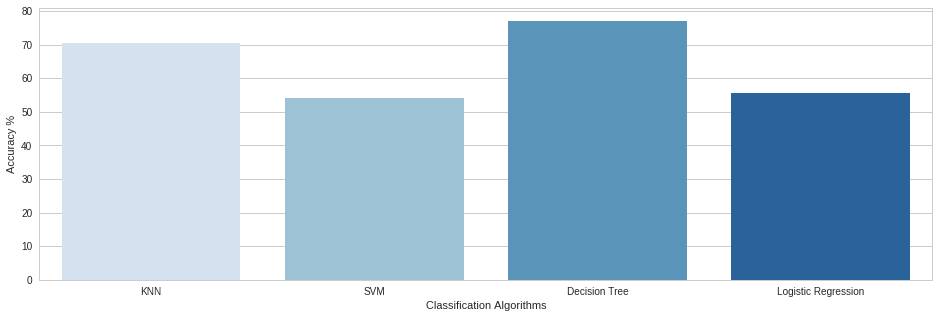

In [119]:
classification = ["KNN", "SVM", "Decision Tree", "Logistic Regression"]
accuracy = [70.49, 54.08, 77.04, 55.7]


plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Classification Algorithms")
sns.barplot(x=classification, y=accuracy)
plt.show()

# Conclusion

* Found the best k value to be 7;  kNN classifies with an accuracy of 70.49%
* Decision tree has the highest accuracy at 77.04%


Reasons for low accuracy of SVM and Logistic Regression-
* Linearity:

> 1. Linear classification algorithms assume that classes can be separated by a straight line.
> 2. Linear regression algorithms assume that data trends follow a straight line. These assumptions aren't bad for some problems, but on others they bring accuracy down

Reference:

Link- https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice


